# Library Examples

## Archiving information

In [5]:
from datetime import datetime, timedelta

from pytz import UTC

from epicsarchiver import ArchiverAppliance

%matplotlib inline

In [6]:
archiver = ArchiverAppliance("archiver-linac-04.tn.esss.lu.se")
pv = "DTL-010:EMR-TT-001:Temp"

In [7]:
archiver.get_pv_status(pv)

[{'lastRotateLogs': 'Never',
  'appliance': 'archiver-linac-02',
  'pvName': 'DTL-010:EMR-TT-001:Temp',
  'pvNameOnly': 'DTL-010:EMR-TT-001:Temp',
  'connectionState': 'true',
  'lastEvent': 'Dec/12/2024 15:32:52 +01:00',
  'samplingPeriod': '0.07',
  'isMonitored': 'true',
  'connectionLastRestablished': 'Sep/12/2024 11:13:11 +02:00',
  'connectionFirstEstablished': 'Aug/27/2024 10:35:52 +02:00',
  'connectionLossRegainCount': '8',
  'status': 'Being archived'}]

In [4]:
archiver.get_pv_details(pv)

[{'name': 'PV Name', 'value': 'DTL-010:EMR-TT-001:Temp', 'source': 'mgmt'},
 {'name': 'Instance archiving PV',
  'value': 'archiver-linac-02',
  'source': 'mgmt'},
 {'name': 'Archival params creation time:',
  'value': 'Mar/09/2023 10:11:56 +01:00',
  'source': 'mgmt'},
 {'name': 'Archival params modification time:',
  'value': 'Mar/10/2023 10:00:41 +01:00',
  'source': 'mgmt'},
 {'name': 'Archiver DBR type (from typeinfo):',
  'value': 'DBR_SCALAR_DOUBLE',
  'source': 'mgmt'},
 {'name': 'Is this a scalar:', 'value': 'Yes', 'source': 'mgmt'},
 {'name': 'Number of elements:', 'value': '1', 'source': 'mgmt'},
 {'name': 'Precision:', 'value': '0.0', 'source': 'mgmt'},
 {'name': 'Units:', 'value': 'degC', 'source': 'mgmt'},
 {'name': 'Is this PV paused:', 'value': 'No', 'source': 'mgmt'},
 {'name': 'Sampling method:', 'value': 'MONITOR', 'source': 'mgmt'},
 {'name': 'Sampling period:', 'value': '0.07', 'source': 'mgmt'},
 {'name': 'Are we using PVAccess?', 'value': 'No', 'source': 'mgmt'},

## Getting Data

In [8]:
archiver.get_events(pv, datetime.now(tz=UTC) - timedelta(seconds=1), datetime.now(tz=UTC))

[ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.07, secondsintoyear=29946776, year=2024, nanos=871630988, severity=0, status=0, field_values=[]),
 ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.09, secondsintoyear=29946776, year=2024, nanos=911302087, severity=0, status=0, field_values=[]),
 ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.11, secondsintoyear=29946776, year=2024, nanos=961295853, severity=0, status=0, field_values=[]),
 ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.07, secondsintoyear=29946777, year=2024, nanos=11289178, severity=0, status=0, field_values=[]),
 ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.09, secondsintoyear=29946777, year=2024, nanos=51297845, severity=0, status=0, field_values=[]),
 ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.07, secondsintoyear=29946777, year=2024, nanos=151318914, severity=0, status=0, field_values=[]),
 ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.080000000000002, secondsintoyear=29946777, year=2024, nan

In [9]:
df = archiver.get_data(pv, datetime.now(tz=UTC) - timedelta(seconds=30), datetime.now(tz=UTC))

In [10]:
df.head()

val
date                                      
2024-12-12 14:32:29.221293335+00:00  25.07
2024-12-12 14:32:29.271292973+00:00  25.11
2024-12-12 14:32:29.321302366+00:00  25.07
2024-12-12 14:32:29.361298308+00:00  25.09
2024-12-12 14:32:29.411294264+00:00  25.11

## Async Fetch Data

In [11]:
from epicsarchiver.retrieval.archiver_retrieval.async_archiver_retrieval import AsyncArchiverRetrieval
from pytz import timezone

In [12]:
tz = timezone("Europe/Stockholm")

In [15]:
async with AsyncArchiverRetrieval(archiver.hostname) as a_archiver:
    print(await a_archiver.get_events(pv, datetime.now(tz=tz) - timedelta(microseconds=100), datetime.now(tz=tz)))

[ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.11, secondsintoyear=29946798, year=2024, nanos=201295837, severity=0, status=0, field_values=[]), ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.07, secondsintoyear=29946808, year=2024, nanos=11298347, severity=0, status=0, field_values=[])]


In [16]:
async with AsyncArchiverRetrieval(archiver.hostname) as a_archiver:
    print(await a_archiver.get_all_events([pv, "DTL-020:EMR-TT-001:Temp", "DTL-030:EMR-TT-001:Temp"], datetime.now(tz=tz) - timedelta(microseconds=100), datetime.now(tz=tz)))

{'DTL-010:EMR-TT-001:Temp': [ArchiveEvent(pv='DTL-010:EMR-TT-001:Temp', val=25.09, secondsintoyear=29946810, year=2024, nanos=391296875, severity=0, status=0, field_values=[])], 'DTL-020:EMR-TT-001:Temp': [ArchiveEvent(pv='DTL-020:EMR-TT-001:Temp', val=25.240000000000002, secondsintoyear=29946810, year=2024, nanos=391551705, severity=0, status=0, field_values=[])], 'DTL-030:EMR-TT-001:Temp': [ArchiveEvent(pv='DTL-030:EMR-TT-001:Temp', val=25.28, secondsintoyear=29946810, year=2024, nanos=321705751, severity=0, status=0, field_values=[]), ArchiveEvent(pv='DTL-030:EMR-TT-001:Temp', val=25.3, secondsintoyear=29946810, year=2024, nanos=422025493, severity=0, status=0, field_values=[])]}


## Displaying and Calculating Summaries

In [8]:
df.plot()

<Axes: xlabel='date'>

In [9]:
from epicsarchiver.retrieval.archiver_retrieval import Processor, ProcessorName

<Axes: xlabel='date'>

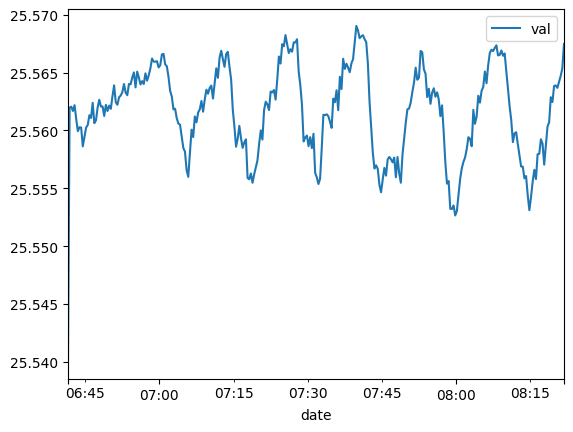

In [10]:
archiver.get_data(pv, datetime.now(tz=UTC) - timedelta(seconds=6000), datetime.now(tz=UTC), Processor(ProcessorName.MEAN, 20)).plot()

## Archiver Archiving Statistics

In [11]:
from epicsarchiver.statistics.archiver_statistics import ArchiverStatistics

In [12]:
archiver_stats = ArchiverStatistics("archiver-linac-04.tn.esss.lu.se")

In [13]:
from pprint import pprint

pprint(await archiver_stats.get_pv_details([pv]))

{'DTL-010:EMR-TT-001:Temp': PVStats(name='DTL-010:EMR-TT-001:Temp',
                                    stats={<Stat.LostConnection: 'In the top dropped connections.'>: LostConnectionsResponse(pv_name='DTL-010:EMR-TT-001:Temp',
                                                                                                                             currently_connected=<ConnectionStatus.CurrentlyConnected: 1>,
                                                                                                                             instance='archiver-linac-02',
                                                                                                                             lost_connections=8),
                                           <Stat.StorageRates: 'In the top storage rates.'>: StorageRatesResponse(pv_name='DTL-010:EMR-TT-001:Temp',
                                                                                                                  mb_per_day=26.03,
   

In [14]:
await archiver_stats.get_storage_rates()

[StorageRatesResponse(pv_name='TS2-010CRM:EMR-XRS-001:mca1', mb_per_day=1652.756524044105, kb_per_hour=70517.61169254848, gb_per_year=589.1173156993148),
 StorageRatesResponse(pv_name='TD-M:Ctrl-SCE-1:NepEvtF14HzTstTime-I', mb_per_day=45.09321170317744, kb_per_hour=1923.977032668904, gb_per_year=16.073263937167738),
 StorageRatesResponse(pv_name='TD-M:Ctrl-EVR-1:EvtF14HzTstTime-I', mb_per_day=45.04465019961617, kb_per_hour=1921.9050751836235, gb_per_year=16.055954416855375),
 StorageRatesResponse(pv_name='TD-M:Ctrl-SCE-1:EvtF14HzTst-I', mb_per_day=38.12419627288986, kb_per_hour=1626.6323743099674, gb_per_year=13.589191054301562),
 StorageRatesResponse(pv_name='DTL-010:EMR-SM-003:Axis-PosAct', mb_per_day=35.7368677604903, kb_per_hour=1524.773024447586, gb_per_year=12.73823899665914),
 StorageRatesResponse(pv_name='DTL-040:EMR-SM-002:Axis-PosAct', mb_per_day=35.56785031686508, kb_per_hour=1517.561613519577, gb_per_year=12.677993521148199),
 StorageRatesResponse(pv_name='DTL-040:EMR-TT-01